In [1]:
import numpy as np
import pandas as pd
import gzip
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [4]:
filePath_train_set = 'MNIST-Fashion-data/train-images-idx3-ubyte.gz'

In [5]:
filePath_train_label = 'MNIST-Fashion-data/train-labels-idx1-ubyte.gz'

In [6]:
filePath_test_set = 'MNIST-Fashion-data/t10k-images-idx3-ubyte.gz'

In [7]:
filePath_test_label = 'MNIST-Fashion-data/t10k-labels-idx1-ubyte.gz'

In [8]:
with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

In [9]:
X_train = trainSet
X_test = testSet
y_train = trainLabel
y_test = testLabel

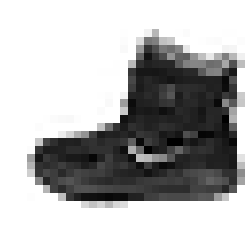

In [10]:
showImage(X_train[0])

In [11]:
y_train[0]

9

In [12]:
X_test.shape

(10000, 784)

In [13]:
 np.random.seed(42)

In [14]:
shuffle_index = np.random.permutation(60000)

In [15]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [16]:
X_train.shape

(60000, 784)

In [17]:
y_train.shape

(60000,)

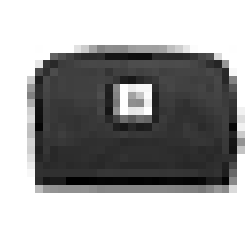

In [18]:
showImage(X_train[1])

In [19]:
X_train[1].shape

(784,)

In [20]:
X_train[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   0,   0,  29,  51,  91, 124, 114, 116, 118,  99,  95,  95,
        96,  91,  65,  49,  25,   3,   0,   0,   0,   0,   1,   0,   0,
         0,   0, 156, 176, 190, 203, 211, 212, 209, 234, 234, 23

In [21]:
y_train[1]

8

In [22]:
y_train.shape

(60000,)

In [23]:
scaler = StandardScaler()

In [24]:
 X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [25]:
X_train_scaled[10]

array([-0.00864371, -0.02322333, -0.03917806, -0.04132172, -0.05764574,
       -0.07116733, -0.09887846, -0.15665259, -0.19712661, -0.37782706,
       -0.57054527, -0.69403914,  0.37741081,  1.4298268 ,  0.00707357,
       -0.07055439,  0.93319955,  1.29446777, -0.50439979, -0.31993203,
       -0.15385759, -0.06939097, -0.10981155, -0.09222425, -0.06827667,
       -0.05051678, -0.0332743 , -0.01362235, -0.01257211, -0.0178614 ,
       -0.03304933, -0.05590652, -0.07809375, -0.13108968, -0.24379931,
       -0.36394987, -0.4880071 , -0.64360797, -0.83405052, -0.39205226,
        1.33113269,  1.23374138,  1.42658452,  1.35358907,  1.25533926,
        1.55580481,  1.42796723, -0.59446618, -0.44141589, -0.31630739,
       -0.20743702, -0.14894698, -0.11854528, -0.09005845, -0.05847776,
       -0.02894636, -0.01552501, -0.02550164, -0.04603359, -0.07369479,
        0.0546704 , -0.24069464, -0.38625307, -0.50240771, -0.62994171,
       -0.82213813, -0.90938292,  1.21360651,  1.4162253 ,  1.19

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix

In [27]:
from sklearn.linear_model import SGDClassifier

In [28]:
sgd_clf = SGDClassifier(random_state=42)

In [29]:
sgd_clf.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
y_train_predict = sgd_clf.predict(X_train[0].reshape(1, -1))

In [31]:
y_train[0] 

8

In [32]:
y_train_predict[0]

8

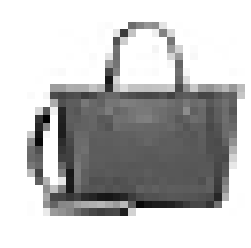

In [33]:
showImage(X_train[0])

In [34]:
y_train_predict = sgd_clf.predict(X_train_scaled)

In [35]:
sgd_accuracy = accuracy_score(y_train, y_train_predict)
sgd_precision = precision_score(y_train, y_train_predict, average='weighted')
sgd_recall = recall_score(y_train, y_train_predict, average='weighted')
sgd_f1_score = f1_score(y_train, y_train_predict, average='weighted')
sgd_class_report = classification_report(y_train, y_train_predict)

In [36]:
print ("Accuracy is :: " , sgd_accuracy)
print ("Precision is :: " , sgd_precision)
print ("Recall is :: " , sgd_recall)
print ("F1_score :: " , sgd_f1_score)


Accuracy is ::  0.8460833333333333
Precision is ::  0.8452191984816628
Recall is ::  0.8460833333333333
F1_score ::  0.8438106231931057


In [37]:
print ("SGDClassifier Classification Report :: " , sgd_class_report)

SGDClassifier Classification Report ::                precision    recall  f1-score   support

           0       0.81      0.82      0.82      6000
           1       0.98      0.96      0.97      6000
           2       0.73      0.78      0.75      6000
           3       0.75      0.90      0.82      6000
           4       0.76      0.72      0.74      6000
           5       0.96      0.93      0.94      6000
           6       0.70      0.54      0.61      6000
           7       0.93      0.91      0.92      6000
           8       0.91      0.95      0.93      6000
           9       0.92      0.97      0.94      6000

   micro avg       0.85      0.85      0.85     60000
   macro avg       0.85      0.85      0.84     60000
weighted avg       0.85      0.85      0.84     60000



In [38]:
#Training Model using Softmax Regression (multi-class classification problem)

In [39]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10,random_state=42)

In [40]:
log_clf.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
y_train[0] 


8

In [42]:
y_train_predict[0]


8

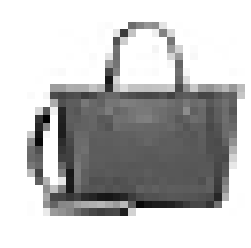

In [43]:
showImage(X_train[0])

In [44]:
y_train_predict = log_clf.predict(X_train_scaled)

In [45]:
log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')
log_report = classification_report(y_train, y_train_predict)

In [46]:
print ("------------Different score for LogisticRegression")
print ("Accuracy is :: " , log_accuracy)
print ("Precision is :: " , log_precision)
print ("Recall is :: " , log_recall)
print ("F1_score :: " , log_f1_score)

------------Different score for LogisticRegression
Accuracy is ::  0.87755
Precision is ::  0.8766648092442357
Recall is ::  0.87755
F1_score ::  0.8769448048542856


In [47]:
print ("LogisticRegression Classification Report :: " , log_report)

LogisticRegression Classification Report ::                precision    recall  f1-score   support

           0       0.82      0.85      0.84      6000
           1       0.98      0.98      0.98      6000
           2       0.79      0.78      0.78      6000
           3       0.88      0.90      0.89      6000
           4       0.78      0.81      0.80      6000
           5       0.96      0.95      0.95      6000
           6       0.70      0.65      0.67      6000
           7       0.93      0.95      0.94      6000
           8       0.96      0.96      0.96      6000
           9       0.96      0.96      0.96      6000

   micro avg       0.88      0.88      0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000



In [48]:
#Training the model using DecisionTreeClassifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)

In [50]:
## Scaling is not needed for Decision Tree algorithm , hence X_train has been used
dec_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [53]:
y_train_predict = dec_tree_clf.predict(X_train[1].reshape(1, -1))

In [54]:
y_train[0]

8

In [55]:
y_train_predict[0]

8

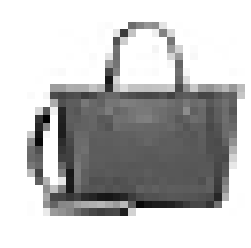

In [56]:
showImage(X_train[0])

In [57]:
y_train_predict = dec_tree_clf.predict(X_train)

In [58]:
y_train_predict[1]

8

In [59]:
dec_tree_accuracy = accuracy_score(y_train, y_train_predict)
dec_tree_precision = precision_score(y_train, y_train_predict, average='weighted')
dec_tree_recall = recall_score(y_train, y_train_predict, average='weighted')
dec_tree_f1_score = f1_score(y_train, y_train_predict, average='weighted')
dec_tree_report = classification_report(y_train, y_train_predict)

In [60]:
print ("------------Different score for DecisionTreeClassifier")
print ("Accuracy is :: " , dec_tree_accuracy)
print ("Precision is :: " , dec_tree_precision)
print ("Recall is :: " , dec_tree_recall)
print ("F1_score :: " , dec_tree_f1_score)

------------Different score for DecisionTreeClassifier
Accuracy is ::  1.0
Precision is ::  1.0
Recall is ::  1.0
F1_score ::  1.0


In [61]:
print ("DecisionTreeClassifier Classification Report :: " , dec_tree_report)

DecisionTreeClassifier Classification Report ::                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      6000
           4       1.00      1.00      1.00      6000
           5       1.00      1.00      1.00      6000
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

   micro avg       1.00      1.00      1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [62]:
##Training the model using RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree based algorithms like Random Forest and XGBoost

In [65]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [66]:
y_train_predict = rnd_clf.predict(X_train[0].reshape(1, -1))

In [67]:
y_train[0]

8

In [68]:
y_train_predict[0]

8

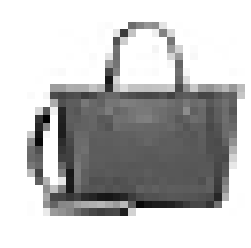

In [69]:
showImage(X_train[0])

In [70]:
y_train_predict = rnd_clf.predict(X_train)

In [73]:
rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')
rnd_report = classification_report(y_train, y_train_predict)

In [74]:
print ("------------Different score for RandomForestClassifier")
print ("Accuracy is :: " , rnd_accuracy)
print ("Precision is :: " , rnd_precision)
print ("Recall is :: " , rnd_recall)
print ("F1_score :: " , rnd_f1_score)



------------Different score for RandomForestClassifier
Accuracy is ::  1.0
Precision is ::  1.0
Recall is ::  1.0
F1_score ::  1.0


In [75]:
print ("RandomForestClassifier Classification Report :: " , rnd_report)

RandomForestClassifier Classification Report ::                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      6000
           4       1.00      1.00      1.00      6000
           5       1.00      1.00      1.00      6000
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

   micro avg       1.00      1.00      1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [76]:
#Training the Model using VotingClassifier

In [77]:
from sklearn.ensemble import VotingClassifier


In [78]:
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10,random_state=42)


In [79]:
rnd_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)


In [80]:
#Create an instance of VotingClassifier by passing following parameters - estimators
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)], voting='soft')

In [81]:
#Train the model using Scaled training dataset 
voting_clf.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Ran...ators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [82]:
y_train_predict = voting_clf.predict(X_train[0].reshape(1, -1))

In [83]:
y_train[0]

8

In [84]:
y_train_predict[0]

8

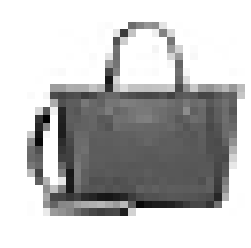

In [85]:
showImage(X_train[0])

In [86]:
y_train_predict = voting_clf.predict(X_train_scaled)

In [87]:
voting_accuracy = accuracy_score(y_train, y_train_predict)
voting_precision = precision_score(y_train, y_train_predict, average='weighted')
voting_recall = recall_score(y_train, y_train_predict, average='weighted')
voting_f1_score = f1_score(y_train, y_train_predict, average='weighted')
voting_report = classification_report(y_train, y_train_predict)


In [88]:
print ("------------Different score for VotingClassifier")
print ("Accuracy is :: " , voting_accuracy)
print ("Precision is :: " , voting_precision)
print ("Recall is :: " , voting_recall)
print ("F1_score :: " , voting_f1_score)

------------Different score for VotingClassifier
Accuracy is ::  0.9653
Precision is ::  0.9653631441482463
Recall is ::  0.9653
F1_score ::  0.9651755214917088


In [89]:
print ("VotingClassifier Classification Report :: " , voting_report)

VotingClassifier Classification Report ::                precision    recall  f1-score   support

           0       0.94      0.96      0.95      6000
           1       1.00      0.99      0.99      6000
           2       0.94      0.94      0.94      6000
           3       0.96      0.98      0.97      6000
           4       0.93      0.96      0.94      6000
           5       0.99      0.98      0.99      6000
           6       0.95      0.88      0.91      6000
           7       0.97      0.98      0.98      6000
           8       0.99      0.99      0.99      6000
           9       0.99      0.98      0.99      6000

   micro avg       0.97      0.97      0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



In [90]:
#Cross-Validation - SGDClassifier

In [91]:
def display_scores(scores):
    print ("The accuracy score", scores)
    print("The mean of scores = " , scores.mean())
    print("The Standard Daviation of scores = " , scores.std())

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [93]:
sgd_cv_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(sgd_cv_scores)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

The accuracy score [0.8352 0.8347 0.8307]
The mean of scores =  0.8335333333333335
The Standard Daviation of scores =  0.0020138409955991125


In [94]:
sgd_cv_accuracy = sgd_cv_scores.mean()

In [95]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [96]:
confusion_matrix(y_train,y_train_pred)

array([[4901,   23,  102,  437,   20,    3,  418,    0,   96,    0],
       [  13, 5720,   69,  159,   17,    1,   18,    0,    3,    0],
       [  49,    7, 4483,  103,  781,    1,  491,    1,   83,    1],
       [ 258,  103,   74, 5168,  234,    0,  148,    0,   14,    1],
       [   9,    6,  683,  299, 4422,    1,  546,    1,   32,    1],
       [   6,    3,    2,    8,    0, 5456,    6,  339,   70,  110],
       [ 927,   19,  718,  346,  599,    0, 3185,    3,  202,    1],
       [   0,    0,    0,    0,    0,  259,    0, 5580,   13,  148],
       [  35,    3,   33,  134,   28,   13,   78,   45, 5625,    6],
       [   0,    3,    0,    4,    0,  118,    1,  397,    5, 5472]])

In [97]:
sgd_cv_precision = precision_score(y_train,y_train_pred, average='weighted')
sgd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
sgd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [98]:
print ("------------Different score for Cross Validation of SGDClassifier")
print ("Score", display_scores(sgd_cv_scores))
print ("Accuracy", sgd_cv_accuracy)
print ("Precision is :: " , sgd_cv_precision)
print ("Recall is :: " , sgd_cv_recall)
print ("F1_score :: " , sgd_cv_f1_score)

------------Different score for Cross Validation of SGDClassifier
The accuracy score [0.8352 0.8347 0.8307]
The mean of scores =  0.8335333333333335
The Standard Daviation of scores =  0.0020138409955991125
Score None
Accuracy 0.8335333333333335
Precision is ::  0.8319712078771339
Recall is ::  0.8335333333333333
F1_score ::  0.8317177626508346


In [99]:
#Cross-Validation - Softmax Regression

In [100]:
log_cv_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(log_cv_scores)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


The accuracy score [0.84905 0.84825 0.84395]
The mean of scores =  0.8470833333333333
The Standard Daviation of scores =  0.0022395436042987695


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [101]:
log_cv_accuracy = log_cv_scores.mean()

In [102]:
y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv=3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [103]:
confusion_matrix(y_train,y_train_pred)

array([[4872,   27,  119,  275,   31,    8,  587,    3,   71,    7],
       [  22, 5802,   21,  114,   14,    1,   21,    3,    1,    1],
       [ 100,   16, 4477,   65,  722,    8,  564,    4,   43,    1],
       [ 227,   83,   71, 5209,  193,    3,  180,    4,   26,    4],
       [  22,   13,  549,  190, 4669,    3,  521,    1,   32,    0],
       [   5,    4,    4,    2,    0, 5521,    3,  280,   54,  127],
       [ 886,   19,  704,  218,  592,    3, 3470,    3,  100,    5],
       [   0,    0,    1,    0,    0,  220,    0, 5555,   15,  209],
       [  58,    6,   40,   45,   28,   52,  123,   30, 5599,   19],
       [   0,    1,    0,    2,    0,  108,    0,  231,    7, 5651]])

In [104]:
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
log_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')


In [105]:
print ("------------Different score for Cross Validation of the Softmax Logistis Regression")
print ("Score is :: " , display_scores(log_cv_scores))
print ("Accuracy is :: " , log_cv_accuracy)
print ("Precision is :: " , log_cv_precision)
print ("Recall is :: " , log_cv_recall)
print ("F1_score :: " , log_cv_f1_score)

------------Different score for Cross Validation of the Softmax Logistis Regression
The accuracy score [0.84905 0.84825 0.84395]
The mean of scores =  0.8470833333333333
The Standard Daviation of scores =  0.0022395436042987695
Score is ::  None
Accuracy is ::  0.8470833333333333
Precision is ::  0.8458694883855286
Recall is ::  0.8470833333333333
F1_score ::  0.846272242627941


In [106]:
#Cross-Validation - DecisionTreeClassifier

In [107]:
dec_tree_cv_scores = cross_val_score(dec_tree_clf, X_train, y_train, cv=3 , scoring="accuracy") 
display_scores(dec_tree_cv_scores)

The accuracy score [0.78925 0.78965 0.7894 ]
The mean of scores =  0.7894333333333333
The Standard Daviation of scores =  0.00016499158227684292


In [108]:
dec_tree_cv_accuracy = dec_tree_cv_scores.mean()

In [111]:
y_train_pred = cross_val_predict(dec_tree_clf, X_train, y_train, cv=3)

In [112]:
confusion_matrix(y_train, y_train_pred)

array([[4398,   39,  147,  299,   74,   24,  938,    2,   70,    9],
       [  43, 5692,   24,  166,   27,    3,   34,    0,   11,    0],
       [ 141,   19, 4086,   96,  875,    6,  696,    3,   72,    6],
       [ 269,  217,  108, 4725,  306,   17,  285,    2,   63,    8],
       [  70,   25,  890,  338, 3879,    6,  729,    2,   57,    4],
       [  15,   14,   10,   20,    4, 5316,   21,  327,   88,  185],
       [ 943,   43,  720,  238,  676,   13, 3232,    2,  129,    4],
       [   2,    0,    2,    1,    0,  356,    1, 5175,   45,  418],
       [  53,   12,   54,   56,   80,   96,  129,   47, 5441,   32],
       [   4,    3,    8,    6,    2,  144,   11,  370,   30, 5422]])

In [113]:
dec_tree_cv_precision = precision_score(y_train,y_train_pred, average='weighted')
dec_tree_cv_recall = recall_score(y_train, y_train_pred , average='weighted')
dec_tree_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [114]:
print ("------------Different score for Cross Validation of the DecisionTreeClassifier")
print ("Score :: " , display_scores(dec_tree_cv_scores))
print ("Accuracy :: " , dec_tree_cv_accuracy)
print ("Precision is :: " , dec_tree_cv_precision)
print ("Recall is :: " , dec_tree_cv_recall)
print ("F1_score :: " , dec_tree_cv_f1_score)

------------Different score for Cross Validation of the DecisionTreeClassifier
The accuracy score [0.78925 0.78965 0.7894 ]
The mean of scores =  0.7894333333333333
The Standard Daviation of scores =  0.00016499158227684292
Score ::  None
Accuracy ::  0.7894333333333333
Precision is ::  0.7894438101880717
Recall is ::  0.7894333333333333
F1_score ::  0.7894183081171982


In [115]:
#Cross-Validation - RandomForestClassifier

In [116]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

rnd_cv_scores = cross_val_score(rnd_clf,X_train,y_train, cv=3, scoring="accuracy") 
display_scores(rnd_cv_scores)

The accuracy score [0.85155 0.84745 0.84585]
The mean of scores =  0.8482833333333334
The Standard Daviation of scores =  0.002400462918318523


In [117]:
rnd_cv_accuracy = rnd_cv_scores.mean()
print (rnd_cv_accuracy)

0.8482833333333334


In [118]:
y_train_pred = cross_val_predict(rnd_clf,X_train,y_train, cv=3)

In [119]:
confusion_matrix(y_train, y_train_pred)

array([[5081,    2,  108,  334,   45,    5,  358,    0,   67,    0],
       [  18, 5691,   57,  199,    8,    1,   21,    0,    5,    0],
       [  39,    2, 4439,   59, 1098,    0,  325,    0,   38,    0],
       [ 147,   18,   65, 5444,  195,    0,  117,    0,   14,    0],
       [   9,    7,  493,  339, 4842,    1,  283,    0,   25,    1],
       [   1,    0,    2,    2,    0, 5502,    0,  351,   32,  110],
       [1195,    8,  831,  198,  709,    2, 2947,    0,  110,    0],
       [   0,    0,    0,    0,    0,   88,    0, 5538,   12,  362],
       [  12,    5,   48,   31,   35,   16,   50,   20, 5777,    6],
       [   1,    0,    2,    4,    2,   52,    1,  290,   12, 5636]])

In [120]:
rnd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
rnd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
rnd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')


In [121]:
print ("------------Different score for Cross Validation of the RandomForestClassifier")
print ("Score is :: " , display_scores(rnd_cv_scores))
print ("Accuracy is :: " , rnd_cv_accuracy)
print ("Precision is :: " , rnd_cv_precision)
print ("Recall is :: " , rnd_cv_recall)
print ("F1_score :: " , rnd_cv_f1_score)


------------Different score for Cross Validation of the RandomForestClassifier
The accuracy score [0.85155 0.84745 0.84585]
The mean of scores =  0.8482833333333334
The Standard Daviation of scores =  0.002400462918318523
Score is ::  None
Accuracy is ::  0.8482833333333334
Precision is ::  0.8482875291253137
Recall is ::  0.8482833333333333
F1_score ::  0.8452574403288833


In [122]:
#Cross-Validation - Ensemble (Voting Classifier)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42 )

In [123]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

In [124]:
voting_cv_scores = cross_val_score(voting_clf, X_train_scaled,  y_train, cv=3, scoring="accuracy" ) 
display_scores(voting_cv_scores)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


The accuracy score [0.86535 0.8652  0.8603 ]
The mean of scores =  0.8636166666666667
The Standard Daviation of scores =  0.002346036847299911


In [125]:
voting_cv_accuracy = voting_cv_scores.mean()

In [126]:
y_train_pred = cross_val_predict(voting_clf, X_train_scaled,  y_train, cv=3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [128]:
confusion_matrix(y_train, y_train_pred)

array([[5047,   17,   94,  266,   23,    7,  474,    3,   66,    3],
       [  14, 5804,   30,  119,   12,    1,   17,    2,    1,    0],
       [  78,   11, 4590,   58,  786,    4,  428,    3,   41,    1],
       [ 159,   39,   57, 5391,  188,    1,  138,    3,   21,    3],
       [  14,    9,  456,  209, 4906,    1,  380,    0,   25,    0],
       [   3,    2,    2,    0,    0, 5624,    2,  239,   35,   93],
       [ 975,   15,  742,  199,  584,    1, 3383,    0,   96,    5],
       [   0,    0,    1,    0,    0,  128,    0, 5644,   11,  216],
       [  39,    2,   25,   30,   22,   27,   89,   25, 5727,   14],
       [   0,    1,    0,    2,    0,   73,    0,  217,    6, 5701]])

In [129]:
voting_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
voting_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
voting_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [130]:
print ("------------Different score for Cross Validation of the Ensemble (Voting Classifier)")
print ("Score is :: " , display_scores(voting_cv_scores))
print ("Accuracy is :: " , voting_cv_accuracy)
print ("Precision is :: " , voting_cv_precision)
print ("Recall is :: " , voting_cv_recall)
print ("F1_score :: " , voting_cv_f1_score)

------------Different score for Cross Validation of the Ensemble (Voting Classifier)
The accuracy score [0.86535 0.8652  0.8603 ]
The mean of scores =  0.8636166666666667
The Standard Daviation of scores =  0.002346036847299911
Score is ::  None
Accuracy is ::  0.8636166666666667
Precision is ::  0.8619820448403134
Recall is ::  0.8636166666666667
F1_score ::  0.8619054772278224


In [131]:
print ("------------Different score for Cross Validation of SGDClassifier")
display_scores(sgd_cv_scores)
print ("Accuracy :: ", sgd_cv_accuracy)
print ("Precision is :: " , sgd_cv_precision)
print ("Recall is :: " , sgd_cv_recall)
print ("F1_score :: " , sgd_cv_f1_score)

print ("------------Different score for Cross Validation of the Softmax Logistis Regression")
display_scores(log_cv_scores)
print ("Accuracy is :: " , log_cv_accuracy)
print ("Precision is :: " , log_cv_precision)
print ("Recall is :: " , log_cv_recall)
print ("F1_score :: " , log_cv_f1_score)

print ("------------Different score for Cross Validation of the DecisionTreeClassifier")
display_scores(dec_tree_cv_scores)
print ("Accuracy :: " , dec_tree_cv_accuracy)
print ("Precision is :: " , dec_tree_cv_precision)
print ("Recall is :: " , dec_tree_cv_recall)
print ("F1_score :: " , dec_tree_cv_f1_score)

print ("------------Different score for Cross Validation of the RandomForestClassifier")
display_scores(rnd_cv_scores)
print ("Accuracy is :: " , rnd_cv_accuracy)
print ("Precision is :: " , rnd_cv_precision)
print ("Recall is :: " , rnd_cv_recall)
print ("F1_score :: " , rnd_cv_f1_score)


print ("------------Different score for Cross Validation of the Ensemble (Voting Classifier)")
display_scores(voting_cv_scores)
print ("Accuracy is :: " , voting_cv_accuracy)
print ("Precision is :: " , voting_cv_precision)
print ("Recall is :: " , voting_cv_recall)
print ("F1_score :: " , voting_cv_f1_score)


------------Different score for Cross Validation of SGDClassifier
The accuracy score [0.8352 0.8347 0.8307]
The mean of scores =  0.8335333333333335
The Standard Daviation of scores =  0.0020138409955991125
Accuracy ::  0.8335333333333335
Precision is ::  0.8319712078771339
Recall is ::  0.8335333333333333
F1_score ::  0.8317177626508346
------------Different score for Cross Validation of the Softmax Logistis Regression
The accuracy score [0.84905 0.84825 0.84395]
The mean of scores =  0.8470833333333333
The Standard Daviation of scores =  0.0022395436042987695
Accuracy is ::  0.8470833333333333
Precision is ::  0.8458694883855286
Recall is ::  0.8470833333333333
F1_score ::  0.846272242627941
------------Different score for Cross Validation of the DecisionTreeClassifier
The accuracy score [0.78925 0.78965 0.7894 ]
The mean of scores =  0.7894333333333333
The Standard Daviation of scores =  0.00016499158227684292
Accuracy ::  0.7894333333333333
Precision is ::  0.7894438101880717
Recal

#### Fine-Tuning the Model - Grid Search - Dimensionality Reduction

In [132]:
from sklearn.decomposition import PCA

In [133]:
pca = PCA(n_components=0.99 )

In [134]:
X_train_reduced = pca.fit_transform(X_train)


In [135]:
pca.n_components_

459

In [136]:
np.sum(pca.explained_variance_ratio_)

0.9900347820630976

In [137]:
X_train_recovered = pca.inverse_transform(X_train_reduced)

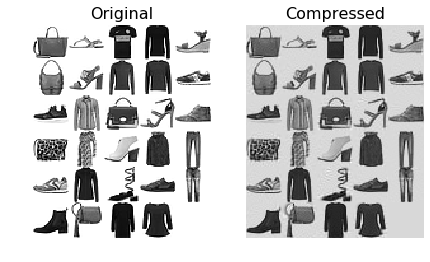

In [138]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

#### Grid Search - Tuning Hyperparameters

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
param_grid = [
    {
        "lr__multi_class":["multinomial"],
        "lr__solver":["lbfgs"],
        "lr__C":[5],
        "rf__n_estimators":[20],
        "rf__max_depth":[10,15],
    }]

In [141]:
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10 , random_state=42)


In [142]:
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10 , random_state=42)


In [143]:
voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

In [144]:
grid_search = GridSearchCV(voting_clf_grid_search, param_grid, cv=3, scoring='neg_mean_squared_error')

In [145]:
grid_search.fit(X_train_reduced, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, war...e=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'lr__multi_class': ['multinomial'], 'lr__solver': ['lbfgs'], 'lr__C': [5], 'rf__n_estimators': [20], 'rf__max_depth': [10, 15]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [146]:
grid_search.best_params_

{'lr__C': 5,
 'lr__multi_class': 'multinomial',
 'lr__solver': 'lbfgs',
 'rf__max_depth': 15,
 'rf__n_estimators': 20}

In [147]:
grid_search.best_estimator_

VotingClassifier(estimators=[('lr', LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rand...mators=20, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [148]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.380380382358428 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
1.3714651532819442 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}


In [149]:
final_model = grid_search.best_estimator_

In [150]:
X_test_reduced = pca.transform(X_test)

In [151]:
y_test_predict = final_model.predict(X_test_reduced)

In [152]:
final_accuracy = accuracy_score(y_test,y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test,y_test_predict, average='weighted')

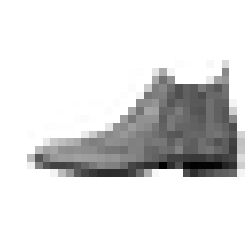

In [153]:
y_test[0]

y_test_predict[0]

showImage(X_test[0])

In [154]:
X_test_reduced.shape

(10000, 459)